In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os
import numpy as np
from matplotlib.ticker import FormatStrFormatter
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


In [2]:
#colors= ['#0124B8',  '#86DBEE', '#009F64',] # old palette: navy, light blue, green
colors = ['#1B2860', '#408BC5', '#E9562B'] # PartMC palette

In [3]:
def log_norm(Dp, Dpg, log10_std, Nt):
    a = Nt / (np.sqrt(2*np.pi)*log10_std)
    b = np.exp(-1*(np.log(Dp)- np.log(Dpg))**2/(2*(log10_std)**2))
    return a*b

In [4]:
n_grid = 400
part_diams = np.logspace(-9, -5, n_grid)

In [5]:
dists = {'nucleation_mode': {'number_conc [m^-3]': 3e9, # 3200 per cubic cm
                                        'geom_mean_diam [m]': 0.0115e-6,
                                        'geom_std_dev': 2,
                                        'mass_frac': {'SO4': 0.75,'NO3': 0,
                                                      'Cl': 0,'NH4': 0.25,
                                                      'MSA': 0,'ARO1': 0,
                                                      'ARO2': 0, 'ALK1': 0,
                                                      'OLE1': 0,'API1': 0,
                                                      'API2': 0,'LIM1': 0,
                                                      'LIM2': 0,'CO3': 0,
                                                      'Na': 0,'Ca': 0,
                                                      'OIN': 0,'OC': 0.0,
                                                      'BC': 0,'H2O': 0},
                                    'pie_loc': [0.1, 0.3, 0.25, 0.25]
                                         },
    
    
                'aitken_mode': {'number_conc [m^-3]': 4e9, # 3200 per cubic cm
                                                    'geom_mean_diam [m]': 0.02e-6,
                                                    'geom_std_dev': 2,
                                                    'mass_frac': {'SO4': 0.25,'NO3': 0,
                                                                'Cl': 0,'NH4': 0.50,
                                                                'MSA': 0,'ARO1': 0,
                                                                'ARO2': 0, 'ALK1': 0,
                                                                'OLE1': 0,'API1': 0,
                                                                'API2': 0,'LIM1': 0,
                                                                'LIM2': 0,'CO3': 0,
                                                                'Na': 0,'Ca': 0,
                                                                'OIN': 0,'OC': 0.25,
                                                                'BC': 0,'H2O': 0},
                                    'pie_loc': [0.2, 0.5, 0.25, 0.25]
                                                    },
                        'accum_mode': {'number_conc [m^-3]': 9e9,
                                        'geom_mean_diam [m]': 0.08e-6,
                                        'geom_std_dev': 2.2,
                                        'mass_frac': {'SO4': 0.10,'NO3': 0,
                                                      'Cl': 0,'NH4': 0.30,
                                                      'MSA': 0,'ARO1': 0,
                                                      'ARO2': 0, 'ALK1': 0,
                                                      'OLE1': 0,'API1': 0,
                                                      'API2': 0,'LIM1': 0,
                                                      'LIM2': 0,'CO3': 0,
                                                      'Na': 0,'Ca': 0,
                                                      'OIN': 0,'OC': 0.60,
                                                      'BC': 0,'H2O': 0},
                                    'pie_loc': [0.36, 0.6, 0.25, 0.25]
                                         },
                        }

Text(0, 0.5, 'Mass Concentration')

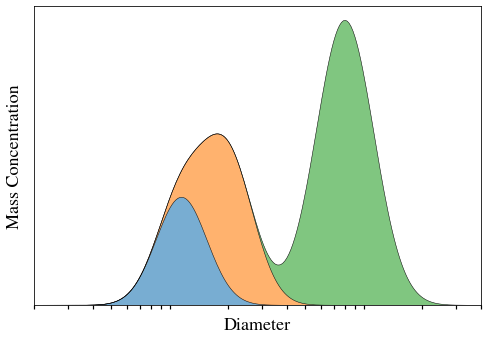

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5.5))
dist_total = np.zeros((n_grid))
for i, (key, attributes) in enumerate(dists.items()):

    name = key
    dpg = attributes['geom_mean_diam [m]']
    nt = attributes['number_conc [m^-3]']
    std = attributes['geom_std_dev']
    log10_std = np.log10(std)
    dist = log_norm(part_diams, dpg, log10_std, nt)

    if i == 0:
        y_lower = ax.get_ylim()[0]
        yl = np.zeros((n_grid))
        yl[:] = y_lower
        y_lower = yl
    else:
        y_lower = dist_old
    dist_total = dist_total + dist
    #ax.plot(part_diams*1e6, dist,  lw='.5')
    ax.plot(part_diams*1e6, dist_total, c='k', lw='.5')
    ax.fill_between(x=part_diams*1e6, y1=y_lower, y2=dist_total, label=name.replace('_', ' ').title(), 
                    alpha=.6)

    dist_old = dist_total
    
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylim(1e1, 1.1e10)
ax.set_xlim(2e-3, .4)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(width=1.2, length=4, which='both')

#ax.grid(which = "major", linewidth = 1, axis='y', ls="dotted", dashes=(.5,5), c='#414141')
#ax.grid(which = "minor", linewidth = 1, axis='x', ls="dotted", dashes=(.5,5), c='#414141')
#ax.grid(which = "major", linewidth = 1, axis='x', ls="dotted", dashes=(.5,5), c='#414141')
#ax.xaxis.set_major_formatter(FormatStrFormatter('%3.2f'))
#ax.tick_params(axis='both', which='major', labelsize=12, direction='in', top=True, right=True, bottom=True, left=True)
#ax.tick_params(axis='both', which='minor',direction='in',top=True, right=True, bottom=True, left=True)

#ax.legend(fontsize=12)  
ax.set_xlabel('Diameter', fontsize=18)
ax.set_ylabel('Mass Concentration', fontsize=18)

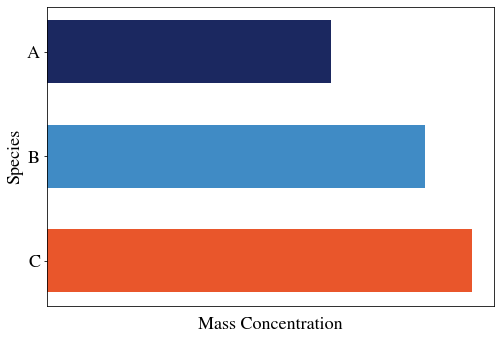

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5.5))
species = ('C','B', 'A')
y_pos = np.arange(len(species))
values = [.45, .4, .3]
ax.barh(y_pos, values, height=.6, align='center', color=colors[::-1])

ax.xaxis.set_ticklabels([])
#ax.yaxis.set_ticklabels([])
ax.set_yticks(y_pos, labels=species, fontsize=18)

#ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
ax.set_ylabel('Species', fontsize=18)
ax.set_xlabel('Mass Concentration', fontsize=18)
plt.savefig(f'bulk-model.pdf', format='pdf', bbox_inches='tight')


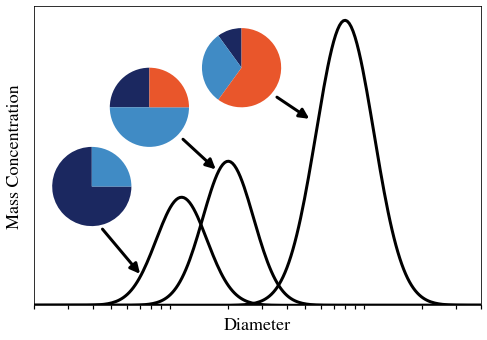

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5.5))
dist_total = np.zeros((n_grid))
for i, (key, attributes) in enumerate(dists.items()):

    name = key
    dpg = attributes['geom_mean_diam [m]']
    nt = attributes['number_conc [m^-3]']
    std = attributes['geom_std_dev']
    log10_std = np.log10(std)
    dist = log_norm(part_diams, dpg, log10_std, nt)

    if i == 0:
        y_lower = ax.get_ylim()[0]
        yl = np.zeros((n_grid))
        yl[:] = y_lower
        y_lower = yl
    else:
        y_lower = dist_old
    dist_total = dist_total + dist
    ax.plot(part_diams*1e6, dist, c='k', lw='3')
    pie_loc = attributes['pie_loc']
    ax2 = fig.add_axes(pie_loc)
    ax2.pie([item for item in list(attributes['mass_frac'].values()) if item != 0], startangle=90, colors=colors)

    dist_old = dist_total
    
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylim(1e1, 1.1e10)
ax.set_xlim(2e-3, .4)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(width=1.2, length=4, which='both')

ax.set_xlabel('Diameter', fontsize=18)
ax.set_ylabel('Mass Concentration', fontsize=18)

arrow_props = dict(arrowstyle="-|>",
                            connectionstyle="arc3",
                            mutation_scale=20,  # Adjust head size as needed
                            linewidth=3,  # Increase body width
                            color='k'
                            )

ax.annotate("",
            xy=(.24, .1), xycoords='axes fraction',
            xytext=(.15, .26), textcoords='axes fraction',
            arrowprops=arrow_props,
            )

ax.annotate("",
            xy=(.41, .45), xycoords='axes fraction',
            xytext=(.33, .56), textcoords='axes fraction',
            arrowprops=arrow_props,
            )

ax.annotate("",
            xy=(.62, .62), xycoords='axes fraction',
            xytext=(.54, .70), textcoords='axes fraction',
            arrowprops=arrow_props,
            )

plt.savefig(f'modal-model.pdf', format='pdf', bbox_inches='tight')


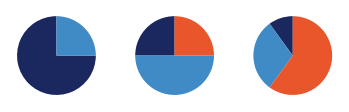

In [8]:

fig, ax = plt.subplots(1, 3)
for i, (key, attributes) in enumerate(dists.items()):
    ax[i].pie([item for item in list(attributes['mass_frac'].values()) if item != 0], startangle=90, colors=colors)
    

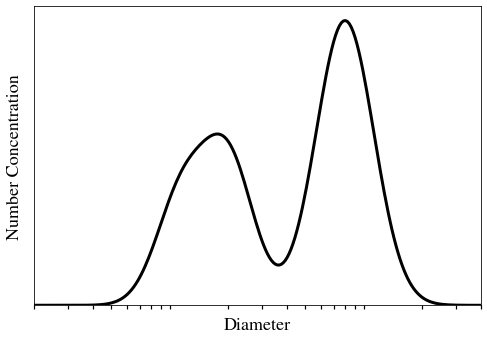

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5.5))
dist_total = np.zeros((n_grid))
for i, (key, attributes) in enumerate(dists.items()):

    name = key
    dpg = attributes['geom_mean_diam [m]']
    nt = attributes['number_conc [m^-3]']
    std = attributes['geom_std_dev']
    log10_std = np.log10(std)
    dist = log_norm(part_diams, dpg, log10_std, nt)

    if i == 0:
        y_lower = ax.get_ylim()[0]
        yl = np.zeros((n_grid))
        yl[:] = y_lower
        y_lower = yl
    else:
        y_lower = dist_old
    dist_total = dist_total + dist
    dist_old = dist_total
ax.plot(part_diams*1e6, dist_total/dist_total.max(), c='k', lw='3')


    
ax.set_xscale('log')

#ax.set_yscale('log')
#ax.set_ylim(1e-3, 1.3)

ax.set_ylim(0, 1.05)

ax.set_xlim(2e-3, .4)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])
ax.yaxis.set_ticks_position('none')
#ax.yaxis.set_tick_params(width=1.2, length=4, which='both')
ax.xaxis.set_tick_params(width=1.2, length=4, which='both')

#ax.grid(which = "major", linewidth = 1, axis='y', ls="dotted", dashes=(.5,5), c='#414141')
#ax.grid(which = "minor", linewidth = 1, axis='x', ls="dotted", dashes=(.5,5), c='#414141')
#ax.grid(which = "major", linewidth = 1, axis='x', ls="dotted", dashes=(.5,5), c='#414141')
#ax.xaxis.set_major_formatter(FormatStrFormatter('%3.2f'))
#ax.tick_params(axis='both', which='major', labelsize=12, direction='in', top=True, right=True, bottom=True, left=True)
#ax.tick_params(axis='both', which='minor',direction='in',top=True, right=True, bottom=True, left=True)

#ax.legend(fontsize=12)  
ax.set_xlabel('Diameter', fontsize=18)
#ax.set_ylabel('Mass Concentration', fontsize=18)
ax.set_ylabel('Number Concentration', fontsize=18)

plt.savefig(f'number-dist.pdf', format='pdf', bbox_inches='tight')


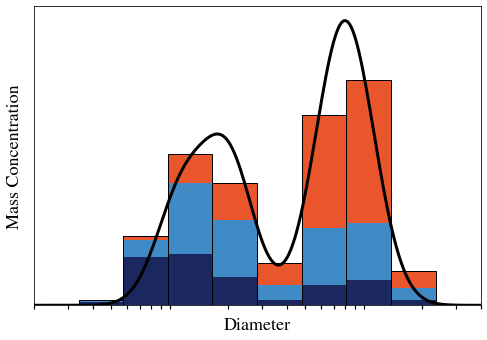

In [10]:
bin_data = np.array([[0, 0, 0],
                     [.01, .01, 0],
                     [.17, .06, .015],
                     [.18, .25, .1],
                     [.1, .2, .13],
                     [.02, .05, .08],
                     [.07, .2, .4],
                     [.09, .2, .5],
                     [.02, .04, .06],
                     [0, 0, 0],
                     ])

n_bins = 10
edges = np.logspace(-2.7, -.40, n_bins+1)
x = np.sqrt(edges[1:]*edges[:-1]) # geometric mean
#b= np.random.random(edges.size-1)
b=bin_data
n_species = 3
x2 = np.expand_dims(x, axis=0)
x3 = np.repeat(x2, n_species, axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(8, 5.5))

N, bins, patches = ax.hist(x3, weights=b, bins=edges, stacked=True)
bin_heights = N[-1, :]
ax.hist(x3[:, 0], weights=bin_heights, bins=edges, edgecolor='k', fc=(0, 0, 0, 0))
for i, c in zip(range(n_species), colors):
    for j in range(n_bins):
        patches[i][j].set_facecolor(c)

# Add distribution
dist_total = np.zeros((n_grid))
for i, (key, attributes) in enumerate(dists.items()):

    name = key
    dpg = attributes['geom_mean_diam [m]']
    nt = attributes['number_conc [m^-3]']
    std = attributes['geom_std_dev']
    log10_std = np.log10(std)
    dist = log_norm(part_diams, dpg, log10_std, nt)

    if i == 0:
        y_lower = ax.get_ylim()[0]
        yl = np.zeros((n_grid))
        yl[:] = y_lower
        y_lower = yl
    else:
        y_lower = dist_old
    dist_total = dist_total + dist
ax.plot(part_diams*1e6, dist_total/dist_total.max(), c='k', lw='3')

ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylim(0, 1.05)
ax.set_xlim(2e-3, .4)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(width=1.2, length=4, which='both')
ax.set_xlabel('Diameter', fontsize=18)
ax.set_ylabel('Mass Concentration', fontsize=18)
plt.savefig(f'sectional-model.pdf', format='pdf', bbox_inches='tight')


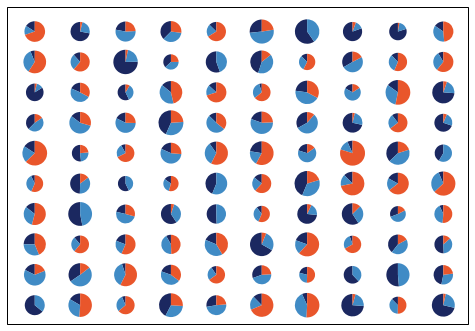

In [11]:
# lower and upper bound on perturbing the bin mass fractions
massfrac_scaling_lower = .5
massfrac_scaling_upper = 1.5
size_scaling_lower = .75
size_scaling_upper = 1.25


bin_probs = bin_heights/bin_heights.sum()
fig, axs = plt.subplots(10, 10, figsize=(8, 5.5))
for i, (ax) in enumerate(axs.flatten()):
    # select a random bin, and a normalized random value
    # if the random value is less than the probability of choosing 
    # the selected bin then plot the particle, otherwise continue 
    # by choosing another random bin and normalized random value
    sectional_idx = np.random.randint(1, 8)
    norm_rand_val = np.random.random()
    bin_prob = bin_probs[sectional_idx]
    while norm_rand_val > bin_prob:
        sectional_idx = np.random.randint(1, 8)
        norm_rand_val = np.random.random()

    # get the bin species mass fractions and perturb them slightly so each particle is unique
    bin_frac = bin_data[sectional_idx]
    scaling_factors = (massfrac_scaling_upper-massfrac_scaling_lower)*np.random.random_sample(size=3) + massfrac_scaling_lower
    part_frac_vals = scaling_factors*bin_frac
    # scale the pie chart radius with random scaling
    size = (size_scaling_upper-size_scaling_lower)*np.random.random_sample(size=1) + size_scaling_lower
    ax.pie(part_frac_vals, startangle=90, colors=colors, radius=size[0])

rect = plt.Rectangle((0.11, 0.11), .8, .8,
                    fill=True, fc='white', ec="k", lw=1, zorder=-1,
                    transform=fig.transFigure)
fig.add_artist(rect)
plt.savefig(f'particle-resolved-model.pdf', format='pdf', bbox_inches='tight')